In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

import scipy.stats as stats

In [2]:
train = pd.read_csv('../data/train.csv')

#### Columns
id - unique ID for excerpt <br>
url_legal - URL of source - this is blank in the test set.<br>
license - license of source material - this is blank in the test set.<br>
excerpt - text to predict reading ease of<br>
target - reading ease<br>
standard_error - measure of spread of scores among multiple raters for each excerpt. Not included for test data.<br>

In [3]:
train.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


#### Missing value

In Train, the values in `url_legal` and `license` are missing; if `url_legal` is specified, `license` is also specified.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2834 non-null   object 
 1   url_legal       830 non-null    object 
 2   license         830 non-null    object 
 3   excerpt         2834 non-null   object 
 4   target          2834 non-null   float64
 5   standard_error  2834 non-null   float64
dtypes: float64(2), object(4)
memory usage: 133.0+ KB


In [5]:
train.dropna(subset=['url_legal']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830 entries, 249 to 2833
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              830 non-null    object 
 1   url_legal       830 non-null    object 
 2   license         830 non-null    object 
 3   excerpt         830 non-null    object 
 4   target          830 non-null    float64
 5   standard_error  830 non-null    float64
dtypes: float64(2), object(4)
memory usage: 45.4+ KB


#### Unique values

In [6]:
print(f'Total number of rows: {train.shape[0]}')
print(f'Number of unique ids: {train.id.nunique()}')
print(f'Number of unique urls: {train.url_legal.nunique()}')
print(f'Number of unique licenses: {train.license.nunique()}')

Total number of rows: 2834
Number of unique ids: 2834
Number of unique urls: 667
Number of unique licenses: 15


#### Excerpt statistics

In [7]:
def get_tokens(text, remove_stopwords=False):
    text = text.strip().lower()
    tokens = word_tokenize(text)
    
    if remove_stopwords:
        tokens = [w for w in tokens if w not in stopwords.words('english')]
        
    return tokens

In [8]:
%%time
train['tokenized'] = train.excerpt.apply(get_tokens, args=(False,))
train['tokenized_wout_stopwords'] = train.excerpt.apply(get_tokens, args=(True,))

Wall time: 2min 35s


In [9]:
tokenized_len = train.tokenized.apply(lambda x: len(x))
tokenized_wout_stopwords_len = train.tokenized_wout_stopwords.apply(lambda x: len(x))

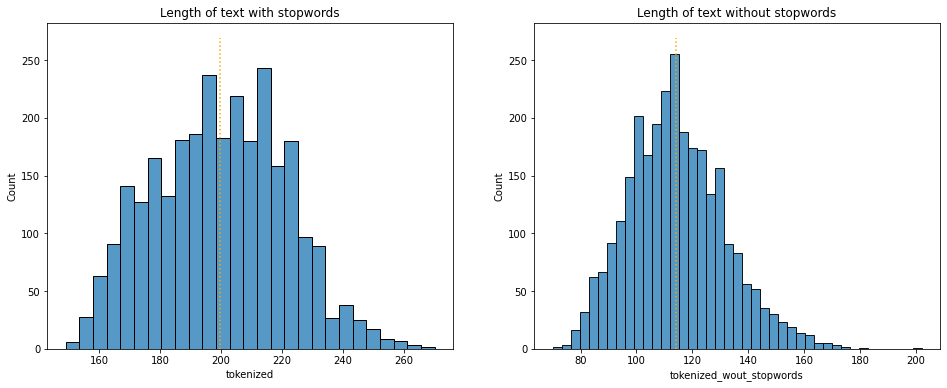

In [10]:
height = 270 

x_with = [tokenized_len.mean() for _ in range(height)]
x_without = [tokenized_wout_stopwords_len.mean() for _ in range(height)]

y = [i for i in range(height)]

fig, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].set_title('Length of text with stopwords')
ax[0].plot(x_with, y, ':', color='orange')
sns.histplot(data=tokenized_len, ax=ax[0])

ax[1].set_title('Length of text without stopwords')
ax[1].plot(x_without, y, ':', color='orange')
sns.histplot(data=tokenized_wout_stopwords_len, ax=ax[1])
plt.show()

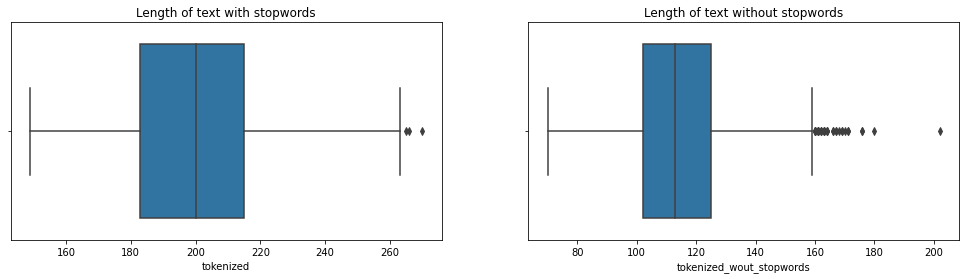

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(17,4))
ax[0].set_title('Length of text with stopwords')
sns.boxplot(x=tokenized_len, ax=ax[0])

ax[1].set_title('Length of text without stopwords')
sns.boxplot(x=tokenized_wout_stopwords_len, ax=ax[1])
plt.show()

In [12]:
print(f'Mean number of stopwords per text: {tokenized_len.mean() - tokenized_wout_stopwords_len.mean()}')

Mean number of stopwords per text: 85.37473535638675


#### Target column

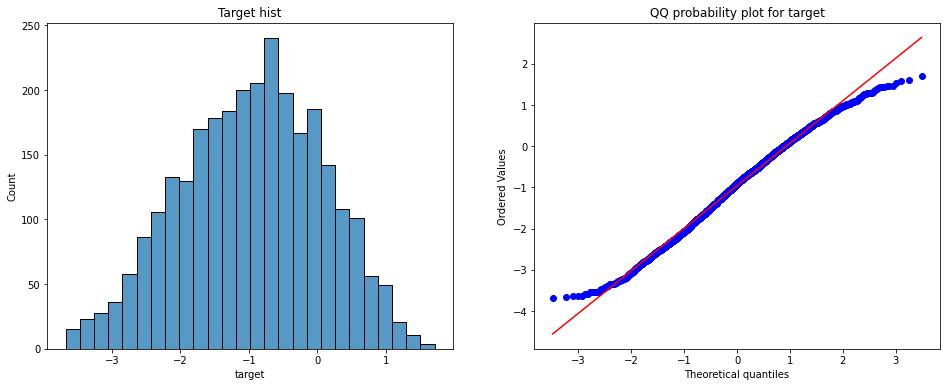

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].set_title('Target hist')
sns.histplot(data=train, x='target', ax=ax[0])

stats.probplot(train.target, dist="norm", plot=ax[1])
ax[1].set_title('QQ probability plot for target')
plt.show()